In [3]:
# 2D Heat diffusion equation
#Assuming constant thermal conductivity
#Dt/dt = alpha(d2T/dx2 + d2Tdy2'''

In [4]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
T = np.arange(1, 26, 1).reshape(5,5)
T

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25]])

In [13]:
L = 0.01
nx, ny = 21, 21
dx = L / (nx-1)
dy = L / (ny-1)
x = np.linspace(0.0, L, num=nx)
y = np.linspace(0.0, L, num=ny)

alpha = 1e-4

# Initial Conditions
T0 = np.full((ny, nx), 20.0)
# print(T0)
# Include Boundary Conditions
T0[0, :] = 100.0 # Bottom boundary
T0[:, 0] = 100.0 # Left boundary

In [22]:
def ftcs(T0, nt, dt, dx, dy, alpha, qx=0.0, qy=0.0):
    T = T0.copy()
    sigma_x = alpha * dt/dx**2
    sigma_y = alpha * dt/dy**2
    ny, nx = T.shape
    I, J = nx // 2, ny // 2
    for n in range(nt):
        T[1:-1, 1:-1] = (T[1:-1, 1:-1] + sigma_x * ( 
                         T[1:-1, :-2] - 2 * T[1:-1, 1:-1] +
                         T[1:-1, 2:]) + sigma_y *
                         (T[:-2, 1:-1] - 2 * T[1:-1,1:-1] + 
                         T[2:, 1:-1]))
        # Update boundary values (Neumann condition).
        
        T[:,-1] = T[:,-2] + qx * dx # Right boundary
        T[-1,:] = T[-2,:] + qy * dy # Top boundary
        # Set center temp limit to 70 deg.
        
        if T[J, I] >= 70.0:
            break
    print('Temperature: {0}, Time step: {1}'.format(T[J,I],
                                                    n + 1))
    return T


In [77]:
nt = 500
sigma = .25
# Using the minimum value between dx and dy ensures stabilititty
dt = sigma * min(dx, dy)**2 / alpha

T = ftcs(T0, nt, dt, dx, dy, alpha)


Temperature: 70.02138294076661, Time step: 256


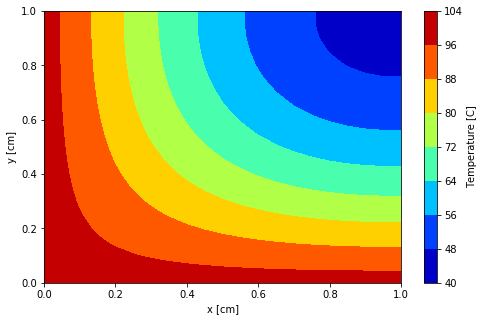

In [78]:
plt.figure(figsize=(8.0, 5.0))
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')
contf = plt.contourf(x * 100, y * 100, T, cmap='jet')
cbar = plt.colorbar(contf)
cbar.set_label('Temperature [C]')